# Introduction

# Data Access

In [84]:
# librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Les parties s’appliquent sur l’ensemble d’entraînement (donc **DailyDelhiClimateTrain.csv**)

In [76]:
data=pd.read_csv("./Data/DailyDelhiClimateTrain.csv")
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [77]:
#verifier les types des données:
data.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

nous allons convertir la colonne date, en format de date

In [78]:
#verifier que le dataset ne contient pas de contenu vide.
data.dropna().shape

(1462, 5)

In [79]:
df = data[['date', 'meantemp']]
df.head(5)

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


 et la variable **meantemp**


On va travailler avec le Dataframe **df**.

# Partie 1

 En utilisant la colonne de température moyenne; soit la meantemp, faites une analyse :
- Time Step (La régression de la température moyenne en fonction du temps)
- Lag Feature (La régression en fonction de l’instant n-1)

In [80]:
# Convertir la colonne "date" en format de date
df['date'] = pd.to_datetime(df['date'])

C:\Users\MIKED\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


nous commencons avec un time plot.

In [81]:
# Convertir la colonne datetime en index (pour respecter la structure)
df.set_index('date', inplace=True)
df.head(5)

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


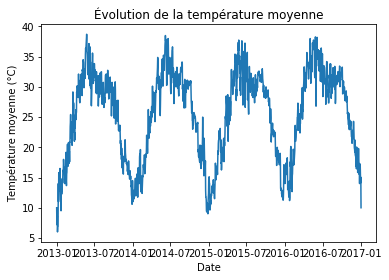

In [82]:
# Définir les axes
x = df.index #c'est la date
y = df["meantemp"]

# Créer le graphique
plt.plot(x, y)

# Ajouter un titre et des étiquettes pour les axes
plt.title("Évolution de la température moyenne")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")

# Afficher le graphique
plt.show()


In [83]:
df.index.values.reshape(-1, 1)

array([['2013-01-01T00:00:00.000000000'],
       ['2013-01-02T00:00:00.000000000'],
       ['2013-01-03T00:00:00.000000000'],
       ...,
       ['2016-12-30T00:00:00.000000000'],
       ['2016-12-31T00:00:00.000000000'],
       ['2017-01-01T00:00:00.000000000']], dtype='datetime64[ns]')

# Partie 2 (TODO)

En rappliquant tous les processus vus en cours, analyser la tendance :
- Tracer des graphes de moyennes glissantes (moving average)
- Utiliser les méthodes de Trend Engineering par le biais de la bibliothèque Deterministic Process afin de déterminer la tendance optimale.
- Faire des graphe pour la tendance linéaire, quadratique, cubique. Tester pour d’autres dimensions.
- Faire un forecast pour 15 jours futurs
- Enlevez la composante de tendance de votre série.


# Partie 3 (TODO)

En réitérant les mécanismes vus en cours, étudier la saisonnalité de la série temporelle:
- Réaliser des Seasonal Plots
- Utiliser les Fourier Features et analyser le périodogramme
- Utiliser les Deterministic Process avec le CalendarFourier afin de détecter la saisonnalité
- Appliquer ces méthodes sur la variable après élimination de la composante de tendance
- Faire un forecast pour 15 jours futurs
- Eliminer la saisonnalité de la composante privée de tendance

# Partie 4 (TODO)

En réitérant les processus vus en cours; analyser les cycles par le biais des Lagged Features:
- Tracer les courbes d’autocorrelation partielle
- Identifier les corrélations avec les Lags passés
- Analyser les cycles par le biais de Lags passés
- Faire un forecast pour 15 jours futurs
- Soustraire les cycles de la composante sans tendance ni saisonnalité

# Partie 5 (TODO)

Appliquer les processus hybrides